In [38]:
! caput dp-ADSim:cam1:Acquire 1

Old : dp-ADSim:cam1:Acquire          Acquire
New : dp-ADSim:cam1:Acquire          Acquire


In [39]:
! caput dp-ADSim:Pva1:EnableCallbacks 1

Old : dp-ADSim:Pva1:EnableCallbacks  Enable
New : dp-ADSim:Pva1:EnableCallbacks  Enable


In [40]:
! pvinfo dp-ADSim:Pva1:Image

dp-ADSim:Pva1:Image
Server: 164.54.29.29:5075
Type:
    epics:nt/NTNDArray:1.0
        union value
            boolean[] booleanValue
            byte[] byteValue
            short[] shortValue
            int[] intValue
            long[] longValue
            ubyte[] ubyteValue
            ushort[] ushortValue
            uint[] uintValue
            ulong[] ulongValue
            float[] floatValue
            double[] doubleValue
        codec_t codec
            string name
            any parameters
        long compressedSize
        long uncompressedSize
        dimension_t[] dimension
            dimension_t
                int size
                int offset
                int fullSize
                int binning
                boolean reverse
        int uniqueId
        time_t dataTimeStamp
            long secondsPastEpoch
            int nanoseconds
            int userTag
        epics:nt/NTAttribute:1.0[] attribute
            epics:nt/NTAttribute:1.0
                

In [41]:
! pvget dp-ADSim:Pva1:Image | grep -v -e "ubyte" -e "byte"

dp-ADSim:Pva1:Image epics:nt/NTNDArray:1.0 
    union value
    codec_t codec
        string name 
        any parameters
            int  1
    long compressedSize 1048576
    long uncompressedSize 1048576
    dimension_t[] dimension
        dimension_t 
            int size 1024
            int offset 0
            int fullSize 1024
            int binning 1
            boolean reverse false
        dimension_t 
            int size 1024
            int offset 0
            int fullSize 1024
            int binning 1
            boolean reverse false
    int uniqueId 82722
    time_t dataTimeStamp 2024-03-15 11:41:52.333  
        long secondsPastEpoch 1710520912
        int nanoseconds 332561254
        int userTag 0
    epics:nt/NTAttribute:1.0[] attribute
        epics:nt/NTAttribute:1.0 
            string name ColorMode
            any value
                int  0
            string descriptor "Color mode"
            int sourceType 0
            string source Driver
    string 

In [42]:
import datetime
import time
import pvaccess

PVA_PV = "dp-ADSim:Pva1:Image"
PROTOCOL = pvaccess.PVA

In [43]:
channel = pvaccess.Channel(PVA_PV, PROTOCOL)

In [44]:
channel.startMonitor()
time.sleep(0.1)
print(f"{PROTOCOL} Channel Name = {channel.getName()} Channel is connected = {channel.isConnected()}")


PVA Channel Name = dp-ADSim:Pva1:Image Channel is connected = True


In [45]:
pv_object = channel.get()
print(f"PV Object = {pv_object}")
channel.stopMonitor()

PV Object = epics:nt/NTNDArray:1.0 
    union value
        byte[]  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [46]:
#Testing how a PV_object looks as dict
pv_dict = pv_object.get()
#pv_dict.get('attribute')

In [47]:
#understanding dictionary comprehension to make a dict about a pv's attributes
#first step is to loop through the list of attr. dicts that are stored in attributes
#next we want what's stored in "name" to be the new key 
#and lastly, what is stored in the new dict to be a list of values dicts stored in the "value" attribute 
attributes = {
        attr["name"]: [val for val in attr.get("value", "")] for attr in pv_dict.get("attribute", {})
    }
print(attributes)


{'ColorMode': [{'value': 0}, {'value': pvaccess.pvaccess.ScalarType.INT}]}


In [48]:
#a loop that adds specific things to the attribute of the PV
for value in ["codec", "uniqueId", "uncompressedSize"]:
    if value in pv_object:
        attributes[value] = pv_object[value]
attributes

{'ColorMode': [{'value': 0}, {'value': pvaccess.pvaccess.ScalarType.INT}],
 'codec': {'name': '',
  'parameters': ({'value': 1}, {'value': pvaccess.pvaccess.ScalarType.INT})},
 'uniqueId': 82755,
 'uncompressedSize': 1048576}

In [49]:
#combine it all into a function
def get_pva_ndattributes(pv_object):
    obj_dict = pv_object.get()

    attributes = {
        attr["name"]: [val for val in attr.get("value", "")] for attr in obj_dict.get("attribute", {})
    }

    for value in ["codec", "uniqueId", "uncompressedSize"]:
        if value in pv_object:
            attributes[value] = pv_object[value]
    
    return attributes

In [50]:
#finding the dimensions of the pv_object
#make sure dimensions value exists, then loop through every 
#we also then need to generate an image by converting the large 1D array
# into a 2D array using the shape we generated
if "dimension" in pv_object:
    shape = [dim["size"] for dim in pv_object["dimension"]]
    print(shape)
    image = pv_object["value"][0]["byteValue"].reshape(*shape)
    print(image)


[1024, 1024]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
#convert it into a function
#all it should do is return a 2D numpy Array to be converted to an image later
def pva_to_image(pv_object):
    if "dimension" in pv_object:
        shape = [dim["size"] for dim in pv_object["dimension"]]
        image = pv_object["value"][0]["byteValue"].reshape(*shape)
    else:
        image = None
    return image

In [52]:
#getting the pva timestamp info
def get_pva_timestamp(pv_object):
    dt = datetime.datetime.now()
    for key in "dataTimeStamp timeStamp".split():
        if key in pv_object:
            # "PVA"
            timestamp = pv_object[key]["secondsPastEpoch"]
            timestamp += pv_object[key]["nanoseconds"] * 1e-9
            dt = datetime.datetime.fromtimestamp(timestamp)
            break
    return dt

In [53]:
#call functions 
pva_image = pva_to_image(pv_object)
pva_attributes = get_pva_ndattributes(pv_object)
pva_timestamp = get_pva_timestamp(pv_object)

if image is not None:
    print(
        f"Shape: \t{pva_image.shape}\n"
        f"DataType: \t{pva_image.dtype}\n"
        f"Min: \t{pva_image.min()}\n"
        f"Max: \t{pva_image.max()}"
    )
for key in pva_attributes:
    print(f"{key}: \t{pva_attributes[key]}")
print(f"timestamp: \t{pva_timestamp}")

Shape: 	(1024, 1024)
DataType: 	int8
Min: 	-128
Max: 	127
ColorMode: 	[{'value': 0}, {'value': pvaccess.pvaccess.ScalarType.INT}]
codec: 	{'name': '', 'parameters': ({'value': 1}, {'value': pvaccess.pvaccess.ScalarType.INT})}
uniqueId: 	82755
uncompressedSize: 	1048576
timestamp: 	2024-03-15 11:41:52.667002


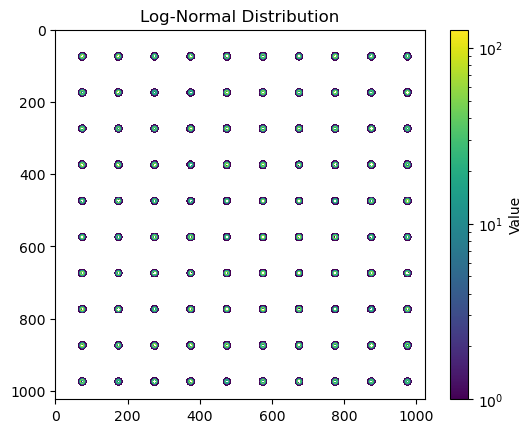

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
 
# data = np.random.rand(10, 10)
 
plt.imshow(image, norm=LogNorm(), cmap='viridis')
plt.colorbar(label='Value')
plt.title('Log-Normal Distribution')
plt.show()
